In [98]:
import numpy as np
import pathlib
import json
import pylab as plt


In [147]:
def get_language(h):
    h = h.split()
    h = filter(lambda x: '--language=' in x, h)
    h = list(h)
    assert len(h) == 1
    return h[0].split('=')[-1][:-2].split('/')[-1]

def get_target(h):
    h = h.split()
    h = filter(lambda x: '--bit_x=' in x, h)
    h = list(h)
    assert len(h) == 1
    return int(h[0].split('=')[-1][:-2])

def parse_file(path, lang2bit2adversarial): 
    with open(path, 'r') as f:
        h = f.readline()
        f.readline()
        lang = get_language(h)
        target = get_target(h)
        
        if lang not in lang2bit2adversarial:
            lang2bit2adversarial[lang] = np.zeros((8, 8))
        
        for line in f:
            if line.startswith('#'): continue
            
            parsed = json.loads(line)
            if parsed['mode'] != 'test': continue
            if parsed['epoch'] < 10: continue
    
            if parsed['acc_X'] >= 0.75:
                for i in range(8):
                    adv_acc = parsed[f'adv_acc_{i}']
                    lang2bit2adversarial[lang][target, i] = adv_acc

    return lang2bit2adversarial
        
def parse_logs(root):
    root = pathlib.Path(root).absolute()
    collected = {}
    for file in root.glob('*.out'):
        parse_file(file, collected)
    return collected
        
logs = parse_logs('/private/home/kharitonov/nest/explain/2019_08_23_05_24_06/')

In [148]:
logs['base2_language.txt']

array([[1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. ]])

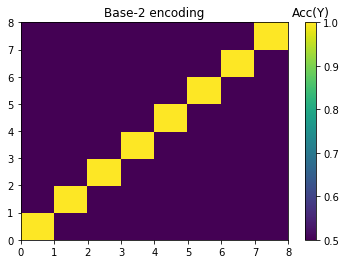

In [149]:
fig, ax = plt.subplots()


data = logs['base2_language.txt']
im = pl.pcolor(data)
clb = pl.colorbar()
clb.ax.set_title("Acc(Y)")

ax.set_title("Base-2 encoding")
pl.show()

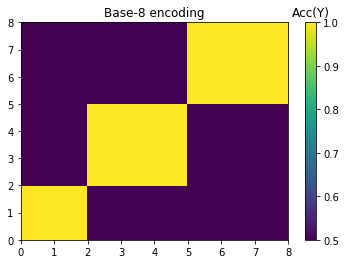

In [150]:
data = logs['base8_language.txt']

fig, ax = plt.subplots()

im = pl.pcolor(data)
clb = pl.colorbar()
clb.ax.set_title("Acc(Y)")

ax.set_title("Base-8 encoding")
pl.show()

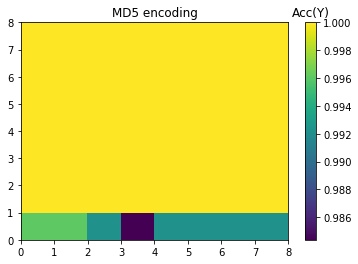

In [151]:
data = logs['md5_language.txt']


fig, ax = plt.subplots()

im = pl.pcolor(data)
clb = pl.colorbar()
clb.ax.set_title("Acc(Y)")

ax.set_title("MD5 encoding")
pl.show()


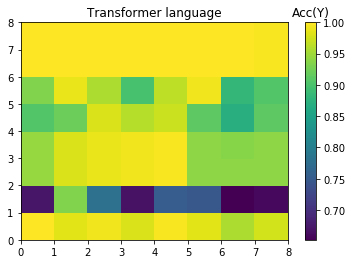

In [152]:
data = logs['transformer_language.txt']


fig, ax = plt.subplots()

im = pl.pcolor(data)
clb = pl.colorbar()
clb.ax.set_title("Acc(Y)")

ax.set_title("Transformer language")
pl.show()



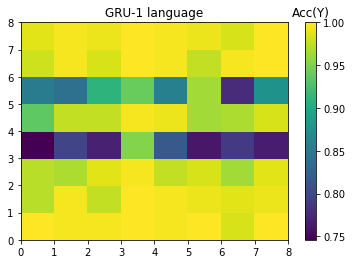

In [153]:
data = logs['vocab8_language_1.txt']

fig, ax = plt.subplots()

im = pl.pcolor(data)
clb = pl.colorbar()
clb.ax.set_title("Acc(Y)")

ax.set_title("GRU-1 language")
pl.show()




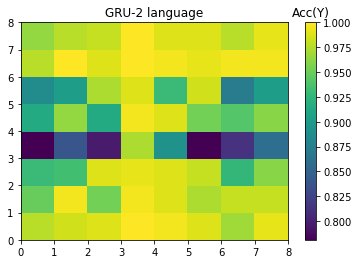

In [154]:
data = logs['vocab8_language_2.txt']

fig, ax = plt.subplots()

im = pl.pcolor(data)
clb = pl.colorbar()
clb.ax.set_title("Acc(Y)")

ax.set_title("GRU-2 language")
pl.show()





In [155]:
logs.keys()

dict_keys(['base2_language.txt', 'transformer_language.txt', 'base8_language.txt', 'md5_language.txt', 'vocab8_language_1.txt', 'vocab8_language_2.txt'])

In [163]:
def get_language(h):
    h = h.split()
    h = filter(lambda x: '--language=' in x, h)
    h = list(h)
    assert len(h) == 1
    return h[0].split('=')[-1][:-2].split('/')[-1]

def get_target(h):
    h = h.split()
    h = filter(lambda x: '--target=' in x, h)
    h = list(h)
    assert len(h) == 1
    return int(h[0].split('=')[-1][:-2])

def parse_file(path, lang2bit2adversarial): 
    with open(path, 'r') as f:
        h = f.readline()
        f.readline()
        lang = get_language(h)
        target = get_target(h)
        
        if lang not in lang2bit2adversarial:
            lang2bit2adversarial[lang] = np.zeros(8) - 1
        
        for line in f:
            if line.startswith('#'): continue
            
            parsed = json.loads(line)
            if parsed['mode'] != 'test': continue
            if parsed['zeroes'] == 0.0: continue

            lang2bit2adversarial[lang][target] = parsed['acc_X']

    return lang2bit2adversarial
        
def parse_logs(root):
    root = pathlib.Path(root).absolute()
    collected = {}
    for file in root.glob('*.out'):
        parse_file(file, collected)
    return collected
        
logs = parse_logs('/private/home/kharitonov/nest/explain/2019_08_24_10_38_26/')

In [166]:
logs['transformer_language.txt']

array([ 0.8125    ,  0.78515625,  0.81640625,  0.8359375 ,  0.8203125 ,
        0.84375   , -1.        ,  0.8359375 ])